<h1 align="center">---- Data Science ----</h1>

----

**0) Packages**

In [8]:
using Pkg
Pkg.add("Tables")
Pkg.add("LsqFit")

   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
⌅ [2fda8390] + LsqFit v0.12.1
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`


In [9]:
using Plots
using Statistics
using StatsBase
using DataFrames
using GLM
using Tables
using XLSX
using MLBase
using RDatasets
using LsqFit

----

**1) Preparing Dataset**

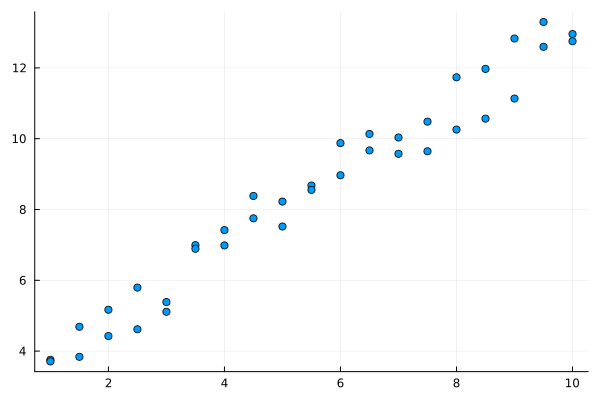

In [17]:
# Datasets
x_values = repeat(1:0.5:10, inner=2)
y_values = 3  .+ x_values .+ 2 .* rand(length(x_values)) .- 1
scatter(x_values, y_values, leg=false)

In [15]:
# Function to get the best line equation fit
function find_best_fit(x_values, y_values)
    mean_x = mean(x_values)
    mean_y = mean(y_values)
    
    std_x = std(x_values)
    std_y = std(y_values)
    
    r = cor(x_values, y_values)
    a = r * std_y / std_x
    b = mean_y - a * mean_x
    
    return a,b
end

a,b = find_best_fit(x_values, y_values)
predicted_y = a.* x_values .+ b

38-element Vector{Float64}:
  4.090810041907563
  4.090810041907563
  4.580107797433772
  4.580107797433772
  5.069405552959981
  5.069405552959981
  5.55870330848619
  5.55870330848619
  6.048001064012398
  6.048001064012398
  6.5372988195386075
  6.5372988195386075
  7.026596575064817
  ⋮
 10.451680863748278
 10.451680863748278
 10.940978619274487
 10.940978619274487
 11.430276374800695
 11.430276374800695
 11.919574130326904
 11.919574130326904
 12.408871885853113
 12.408871885853113
 12.898169641379322
 12.898169641379322

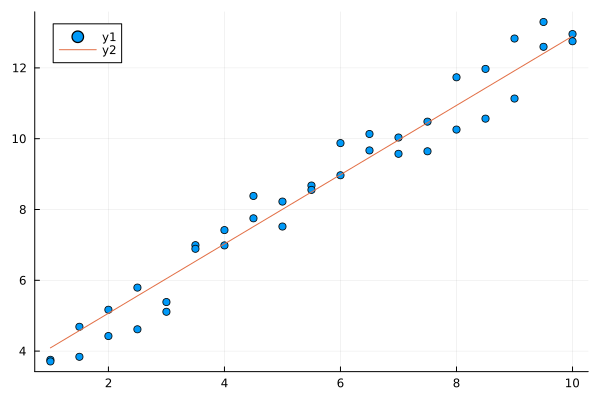

In [18]:
# Plotting the results
scatter(x_values, y_values)
plot!(x_values, predicted_y)

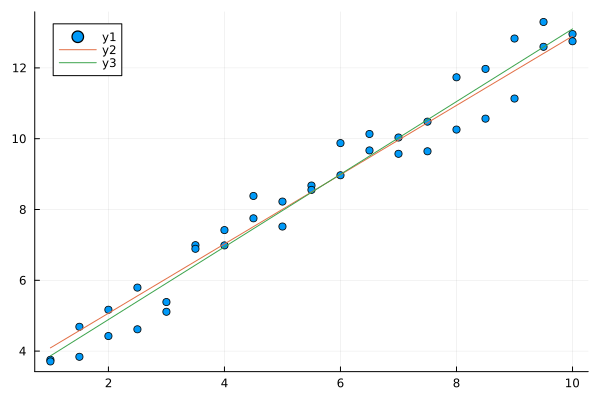

In [22]:
# OLS Model
df = DataFrame(X=x_values, Y=y_values)
ols = lm(@formula(Y ~ X), df)
plot!(x_values, predict(ols))